In [70]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import cross_validation
#from PyPDF2 import PdfFileWriter, PdfFileReader
# from wand.image import Image
# from wand.color import Color
from sklearn.externals import joblib
# import tensorflow as tf
# import tensorflow.python.platform
# from tensorflow.python.platform import gfile
from sklearn.manifold import MDS
import boto, collections, cPickle,json, glob , numpy as np,os, pandas as pd, pickle, random, re, time,matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [2]:
TAC = pd.read_csv('ffclean6-Copy1.csv')

In [3]:
#ATAC_2 = pd.read_csv('ffclean6-Copy1.csv')

In [4]:
#set(TAC['pnns_groups_1'])

In [5]:
TAC.head()

,code,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,brands,categories_en,countries_en,...,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,27533024.0,tacinte,2014-12-16T12:29:19Z,2015-09-22T09:32:26Z,Luxury Christmas Pudding,454g,"plastic,bowl","Asda,Asda Extra Special","Desserts,Puddings,Biscuits-et-gateaux,Gateaux,...",United Kingdom,...,7.0,3.6,54.2,44.0,4.7,3.9,0.200000,0.07874,10,10
1,27533048.0,tacinte,2014-12-16T12:28:35Z,2015-08-09T17:35:41Z,Luxury Christmas Pudding,907g,"plastic,bowl","Asda,Asda Extra Special","Sugary snacks,Desserts,Biscuits and cakes,Cake...",United Kingdom,...,7.0,3.6,54.2,44.0,4.7,3.9,0.199898,0.07870,10,10
2,40608754.0,andre,2012-08-15T09:48:28Z,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",15 cl,Canette aluminium,Pepsi,"Beverages,Carbonated drinks,Sodas,Colas,Sugare...",France,...,0.0,0.0,10.4,10.4,0.0,0.0,0.025400,0.01000,13,2
3,87177756.0,tacite,2015-06-06T10:28:06Z,2015-06-06T11:13:26Z,7Up,33 cl,Canette,"7Up,Pepsico","Beverages,Plant-based beverages,Carbonated dri...",France,...,0.0,0.0,10.4,10.4,NaN,0.0,0.100000,0.03937,13,2
4,790310013.0,malikele,2014-01-02T17:03:07Z,2015-11-04T15:08:31Z,Sour Fruit Gummies,3.5 oz,NaN,Candy Crush,"Sugary snacks,Confectioneries,Candies",Germany,...,0.0,0.0,75.0,57.5,0.0,5.0,0.127000,0.05000,14,14


In [78]:
TAC_clean = TAC.dropna()
TAC_group = TAC[(TAC['pnns_groups_1'] == "Sugary snacks") |
                (TAC['pnns_groups_1'] == "Milk and dairy products") |
               (TAC['pnns_groups_1'] == "Fish Meat Eggs") |
               (TAC['pnns_groups_1'] == "fruits-and-vegetables")] 

In [7]:
TAC_group_clean = TAC_group.dropna()

In [8]:
X = TAC_group_clean [['energy_100g','fat_100g','saturated_fat_100g',
           'carbohydrates_100g','sugars_100g','fiber_100g',
            'proteins_100g','salt_100g','sodium_100g',
           'nutrition_score_fr_100g','nutrition_score_uk_100g']]

y = TAC_group_clean['pnns_groups_1']

In [9]:
le = LabelEncoder()
le.fit(y)
labels = le.transform(y) 

In [10]:
len(set(y))

4

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X ,labels )
#clf = OneVsRestClassifier(LogisticRegression())
clf = OneVsRestClassifier(GradientBoostingClassifier())
#clf = OneVsRestClassifier(SVC(kernel='linear',probability=True))
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.97185741088180111

In [12]:
precision

u'%r'

In [13]:
y_pred =clf.predict(X_test).reshape(-1,1)

In [14]:
set(TAC_clean['pnns_groups_1'])

{'Beverages',
 'Cereals and potatoes',
 'Composite foods',
 'Fat and sauces',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Sugary snacks',
 'cereals-and-potatoes',
 'fruits-and-vegetables',
 'salty-snacks',
 'sugary-snacks',
 'unknown'}

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[309,   2,   3,   0],
       [  8, 436,   9,   2],
       [  1,  14, 723,   1],
       [  0,   3,   2,  86]])

In [16]:
set(TAC_group_clean['pnns_groups_1'])

{'Fish Meat Eggs',
 'Milk and dairy products',
 'Sugary snacks',
 'fruits-and-vegetables'}

In [17]:
#X_test

In [18]:
Fish_Meat_Eggs = X_test[TAC_group_clean['pnns_groups_1'] == 'Fish Meat Eggs']
Milk_and_dairy_products = TAC_group_clean[TAC_group_clean['pnns_groups_1'] == 'Milk and dairy products']
Sugary_snacks = TAC_group_clean[TAC_group_clean['pnns_groups_1'] == 'Sugary snacks']
fruits_and_vegetables = TAC_group_clean[TAC_group_clean['pnns_groups_1'] == 'fruits-and-vegetables']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [19]:
print Fish_Meat_Eggs.shape
print Milk_and_dairy_products.shape
print Sugary_snacks.shape
print fruits_and_vegetables.shape

(314, 11)
(1706, 27)
(3045, 27)
(367, 27)


In [20]:
lst = ['Fish Meat Eggs', 'Milk and dairy products', 'Sugary snacks',
       'fruits-and-vegetables']

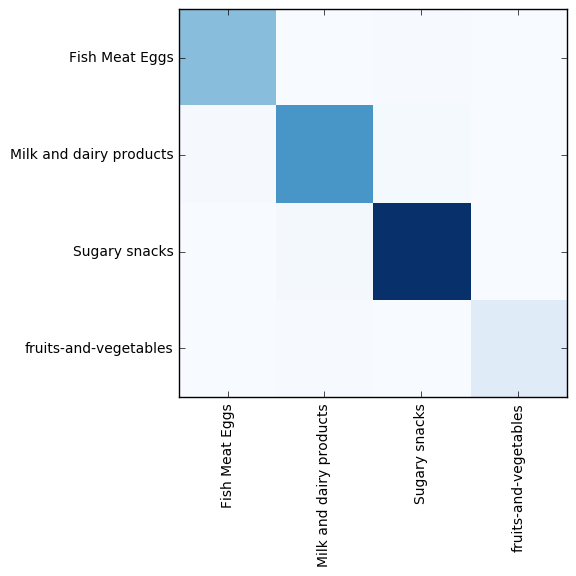

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

cmap=plt.cm.Blues

plt.figure(figsize = (5,5))
plt.imshow(confusion_matrix(y_test,y_pred),
           interpolation='nearest', cmap=cmap)
tick_marks = np.arange(len(lst))
plt.xticks(tick_marks, lst, rotation=90)
plt.yticks(tick_marks, lst)
plt.show()

In [59]:
y_score = clf.predict_proba(X_test)

In [100]:
y = TAC_group_clean['pnns_groups_1']
#y = label_binarize(y, classes=[0, 1,2,3])

In [101]:
y = np.asarray(pd.get_dummies(labels))

In [102]:
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(GradientBoostingClassifier())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [105]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [109]:
fpr.keys()

[0, 1, 2, 3]

In [ ]:
{'Fish Meat Eggs',
 'Milk and dairy products',
 'Sugary snacks',
 'fruits-and-vegetables'}

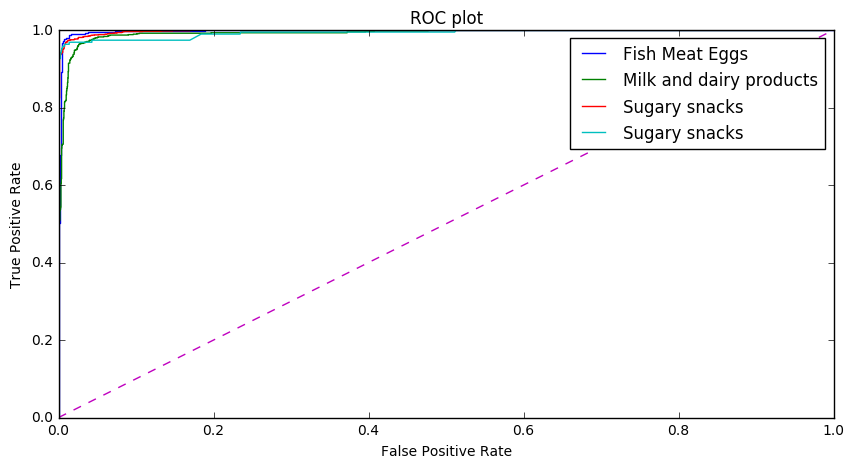

In [110]:
plt.figure(figsize=(10,5))
plt.plot(fpr[0], tpr[0] , label = 'Fish Meat Eggs' )
plt.plot(fpr[1], tpr[1], label = 'Milk and dairy products' )
plt.plot(fpr[2], tpr[2], label = 'Sugary snacks')
plt.plot(fpr[3], tpr[3],label = 'Sugary snacks' )
# plt.ylim([.5,1])
# plt.xlim([0,.5])
plt.legend()
plt.plot(np.linspace(0,1),np.linspace(0,1) , linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC plot")
plt.show()